# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# some library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [6]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/Assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv')
arr_set = cv_set.to_numpy()

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/Assignment 4/UrbanNav-HK_TST-20210517_sensors.csv')
arr_set1 =test_set1.to_numpy()

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/Assignment 4/2020-03-14-16-45-35.csv')
arr_set2 =test_set2.to_numpy()

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [7]:
# TODO: Display first two rows of cv_set
# (1 mark)
# Display the first two rows of the cv_set dataframe
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [8]:
# TODO: Load the info method of cv_set
# (1 mark)
# info method of cv_set
print(cv_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [9]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)


# Display the number of rows and columns  of all three datasets
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [10]:
# TODO: Display all columns in cv_set
# (1 mark)
# Display all columns in cv_set
cv_set.columns

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [11]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state'] # Load target vector into y

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [12]:
# TODO - Load all features from cv_set to X
# (2 marks)
# Load all features from cv_set to X
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [13]:
# import important libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [14]:
# TODO - Perform test/train split
# (1 mark)
#  Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [15]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
# Initializing Pipeline into variable pipe
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [16]:
# TODO - Setup grid set
# (4 marks)

# grid setting
param_grid = [{'scaler': [StandardScaler(), RobustScaler(), None],
               'classifier__C': [0.01, 0.1, 1, 10, 100],
               'classifier__gamma': [0.001, 0.01, 0.1, 1],
               'classifier__kernel': ['rbf']}]

In [17]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1],
                          'classifier__kernel': ['rbf'],
                          'scaler': [StandardScaler(), RobustScaler(), None]}],
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [18]:
# TODO: Print the results from the grid search
# (2 marks)
# Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

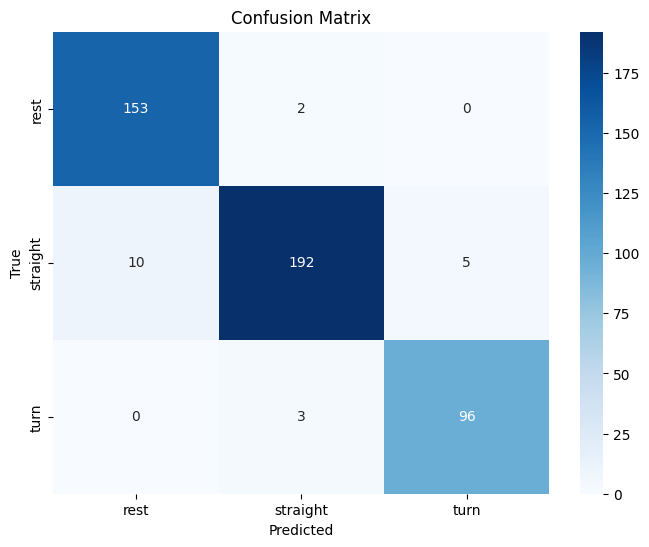

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [19]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. To assess how well the model fits the dataset, we can look at metrics like cross-validation scores and test set accuracy, which generally indicate good performance. However, it's important to dig deeper into the confusion matrix to understand how the model performs on individual classes. If we see significant misclassifications for certain motion states, it could mean the model is overfitting to some classes while struggling with others. A thorough evaluation should also include precision, recall, and F1-score for each class, as a truly effective model should demonstrate balanced performance across all categories.

2. The intervals for C and gamma may need adjustment based on the dataset's characteristics.
C (Regularization Parameter): The range [0.01, 0.1, 1, 10, 100] offers a good starting point, as smaller values indicate stronger regularization (which could lead to underfitting) and larger values suggest weaker regularization (risking overfitting). However, if the optimal C is found at either extreme, it would be wise to expand the range to explore better options.
gamma (Kernel Coefficient): The range [0.001, 0.01, 0.1, 1] is also reasonable. A small gamma results in a smoother decision boundary, while a large gamma can create a more complex boundary that might overfit the data. Similar to C, if the best value falls at the edges of this interval, consider adjusting the range. While these intervals are decent starting points, their effectiveness hinges on the data. If optimal values are found at the boundaries, a more refined grid search with extended or narrower ranges might be necessary to capture potential values that lie in between the specified points.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [20]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [21]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [22]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

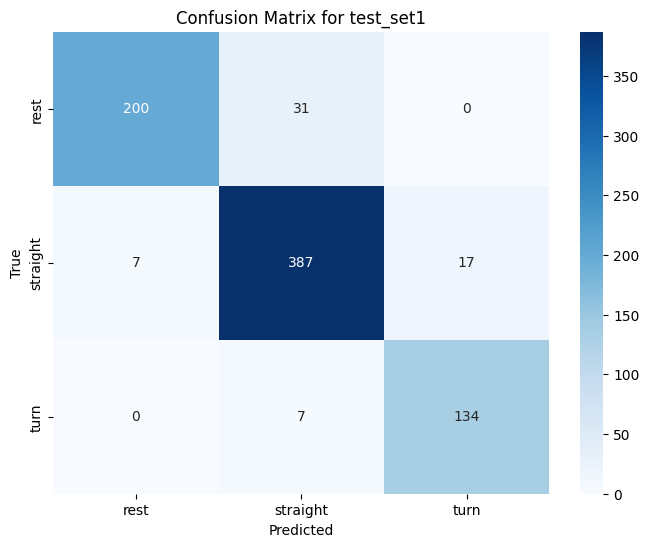

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [23]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

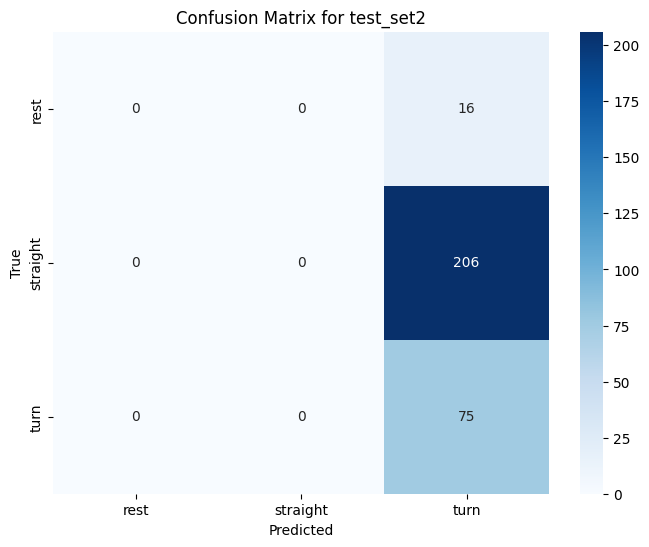

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [25]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y2), yticklabels=np.unique(y2))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

print(classification_report(y2, y2_pred, zero_division=0))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. There is a big difference in how well the model performs on different datasets, this is as a result of data distribution mismatch or dataset bias. For instance, the model performs well on (X_test, y_test) and (X1, y1), but struggle with (X2, y2). This suggests that the training data didn’t capture the unique characteristics of the second test set, leading to its poorer performance.

2. The model's poor performance on test set 2 can be attributed to several factors, including differences in data collection environments, variations in driving conditions, and shifts in feature distribution that weren't present in the training data. To improve performance, it's essential to use techniques like domain adaptation and data augmentation to better represent the unique characteristics of test set 2, along with enhancing the training dataset to include a wider variety of driving conditions and environments.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [26]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [27]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [28]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Perform the test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

# Define the parameter grid
param_grid = [{'scaler': [StandardScaler(), RobustScaler(), None],
               'classifier__C': [0.01, 0.1, 1, 10, 100],
               'classifier__gamma': [0.001, 0.01, 0.1, 1],
               'classifier__kernel': ['rbf']}]

# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1],
                          'classifier__kernel': ['rbf'],
                          'scaler': [StandardScaler(), RobustScaler(), None]}],
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [29]:
# TODO: Print the results from the grid search

# Print the results
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.84
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

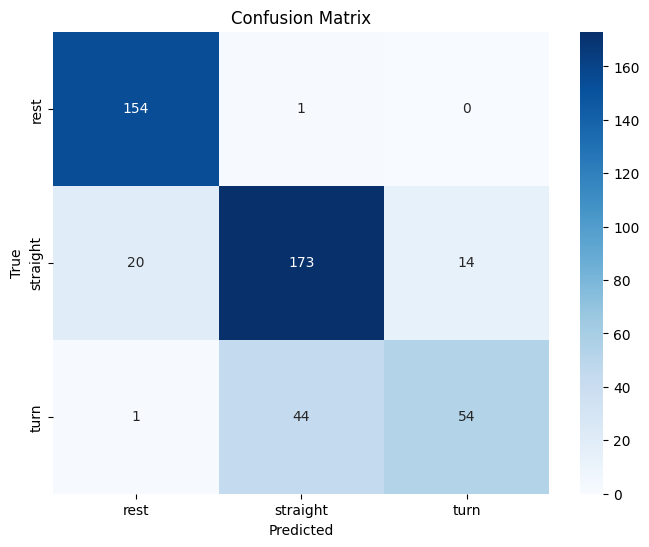

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [30]:
# TODO - Display confusion matrix and print classification reports
# Display the confusion matrix and classification report
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. Based on the data, the first model outperforms the second. It has a higher training score (0.98 vs. 0.84) and shows less overfitting, with a training score of 0.98 compared to a validation score of 0.95. In contrast, the second model has lower scores across the board (0.84 training vs. 0.82 validation and 0.82 validation vs. 0.83 test), indicating it struggles with generalization. Overall, a smaller gap between training and validation scores is preferable, making the first model the better choice here.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [31]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [32]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [33]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

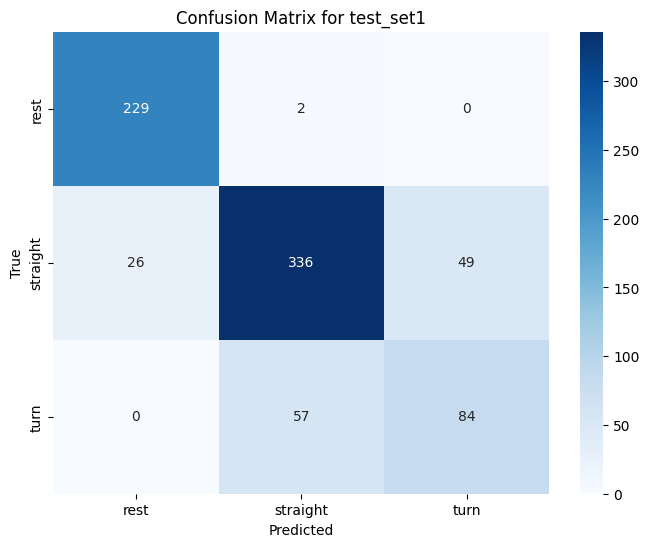

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [34]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

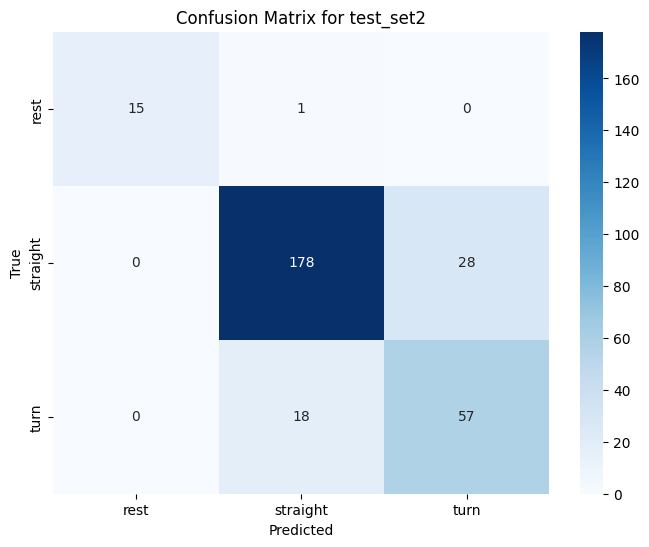

              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [35]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y2), yticklabels=np.unique(y2))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The model performance in section 2.1 demonstrates moderate performance, achieving a training accuracy of about 0.84 and a cross-validation accuracy of around 0.82. The small difference between the training and validation scores indicates that the model generalizes reasonably well to unseen data, suggesting it can perform effectively across different datasets.
The model's performance sees a slight decline on both test sets, achieving accuracies of about 0.80 on test_set1 and 0.76 on test_set2. This suggests that while the model generalizes well to data similar to what it encountered during cross-validation, it struggles a bit when faced with entirely new, independent datasets.
The model seems to fit the training data reasonably well, as there's not a significant gap between the training and validation scores, indicating minimal overfitting. However, the drop in accuracy on the independent test sets suggests that the model may not fully capture the complexities of the underlying patterns in the data, leading to some lack of generalizability. The performance differences between the validation set and the two test sets hint at possible overfitting or distributional differences between the training and testing data. To enhance performance, further investigation into these discrepancies is necessary.

2. In Section 2, the model demonstrates fairly consistent performance across the training/validation set and both test sets. The performance metrics—accuracy, precision, recall, and F1-score—are closely aligned with those observed during training and cross-validation, suggesting that the model generalizes well to unseen data without significant overfitting or underfitting.
When we compare this to Section 1, we see that while the model there achieved higher accuracy on the initial test set (X_test, y_test), it struggled significantly on test_set2, revealing a notable performance gap across the datasets. This suggests that the model in Section 1 may have overfitted to the training data or encountered a mismatch in data distributions. On the other hand, the model in Section 2, which utilized a reduced set of features, showed more consistent performance across all three datasets (training/validation, test_set1, and test_set2).
Although its overall accuracy is lower than that of the first model, this consistency indicates that it is more robust in terms of generalization. The simpler feature set likely contributed to a less complex model that is less prone to overfitting. Thus, despite having lower accuracy compared to the model in Section 1, the reliability of the model in Section 2 across all datasets makes it the preferred choice due to its enhanced robustness.


____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   The features ax_var, ay_var, and az_var represent the variance of acceleration in the x, y, and z directions, respectively. Variations in these values can indicate shifts in motion state, such as transitioning from being stationary to moving or changing direction.

The feature a_sum represents the sum of the acceleration vector norm, calculated as the square root of the sum of the squares of the acceleration components (sqrt(ax² + ay² + az²)). This feature gives a combined measure of acceleration magnitude, which is useful for distinguishing between different motion states. A larger magnitude suggests active acceleration, while a smaller magnitude may indicate that the object is at rest or moving at a constant speed.

The features gx_var, gy_var, and gz_var capture the variances in gyroscope readings along the x, y, and z axes. These variances provide insights into the device's rotational movements, which are essential for identifying motion states that involve turning or spinning.

Justification for chosen features:
These features are closely tied to motion and its changes, as they encompass both linear acceleration (from accelerometer data) and rotational movement (from gyroscope data). Variance measures reflect shifts in motion states, while sums and magnitudes provide an overall sense of motion intensity. Together, these features are effective at distinguishing between different motion states.


In [41]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,8.046094e-07,1.319665e-07,3.267073e-08,9.797418,2.365611e-09,6.964705e-10,7.446916e-10
1,1.032619e-06,1.073067e-07,1.529967e-08,9.798815,2.242613e-09,6.533136e-10,6.983481e-10


In [42]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [43]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Perform the test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

# Define the parameter grid
param_grid = [{'scaler': [StandardScaler(), RobustScaler(), None],
               'classifier__C': [0.01, 0.1, 1, 10, 100],
               'classifier__gamma': [0.001, 0.01, 0.1, 1],
               'classifier__kernel': ['rbf']}]

# Perform grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1],
                          'classifier__kernel': ['rbf'],
                          'scaler': [StandardScaler(), RobustScaler(), None]}],
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [44]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.85
Best cross-validation validation score: 0.82
Test-set score: 0.81


Display the confusion matrix and print the classification report for the trained model using the *test* split.

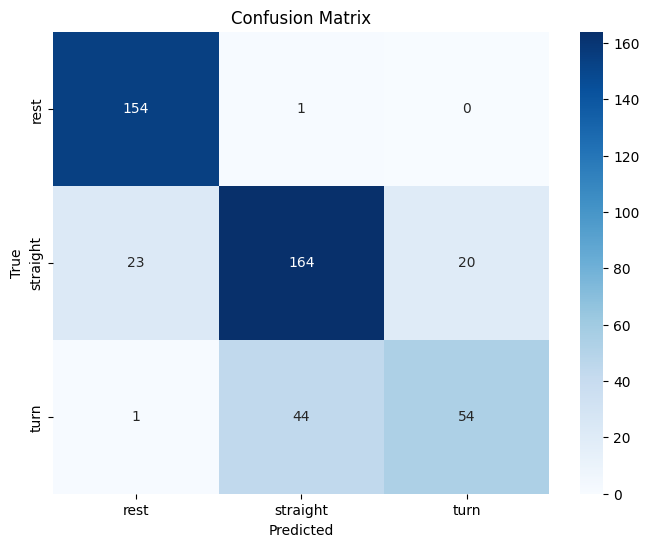

              precision    recall  f1-score   support

        rest       0.87      0.99      0.92       155
    straight       0.78      0.79      0.79       207
        turn       0.73      0.55      0.62        99

    accuracy                           0.81       461
   macro avg       0.79      0.78      0.78       461
weighted avg       0.80      0.81      0.80       461



In [45]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [46]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,0.000001,7.749919e-08,3.920063e-08,9.801661,3.655217e-09,6.507877e-10,7.727190e-10
1,0.000001,9.243000e-08,4.112300e-08,9.802481,3.349120e-09,6.788807e-10,8.871433e-10


In [47]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,0.000002,3.020959e-07,6.324738e-08,9.800683,1.718706e-09,1.211633e-09,1.405038e-09
1,0.000003,6.859937e-07,3.110085e-07,9.797741,2.179497e-09,1.893673e-09,1.164381e-09


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [48]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.79
test_set2 score: 0.61


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

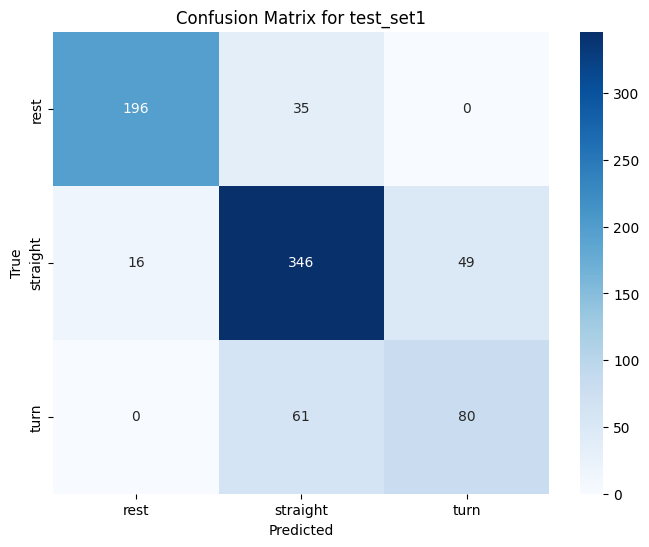

              precision    recall  f1-score   support

        rest       0.92      0.85      0.88       231
    straight       0.78      0.84      0.81       411
        turn       0.62      0.57      0.59       141

    accuracy                           0.79       783
   macro avg       0.78      0.75      0.76       783
weighted avg       0.80      0.79      0.79       783



In [49]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

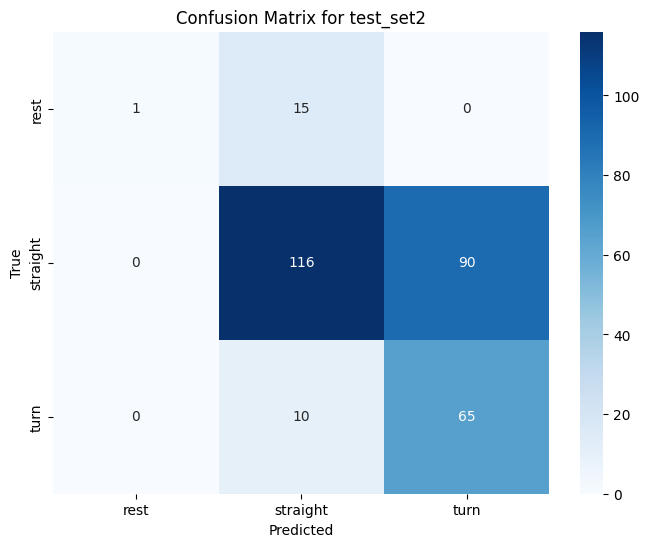

              precision    recall  f1-score   support

        rest       1.00      0.06      0.12        16
    straight       0.82      0.56      0.67       206
        turn       0.42      0.87      0.57        75

    accuracy                           0.61       297
   macro avg       0.75      0.50      0.45       297
weighted avg       0.73      0.61      0.61       297



In [50]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y2), yticklabels=np.unique(y2))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1. Comparison of Models in Sections 1, 2, and 3
Section 1 (All Features):
This model achieves high accuracy on the initial test set but shows inconsistent performance on other datasets, indicating a risk of overfitting.
Section 2 (Selected Features):
In contrast, this model demonstrates more consistent performance across all datasets, although it has lower overall accuracy compared to Section 1. This suggests that it generalizes better, sacrificing some predictive power for reliability.
Section 3 (Group Selected Features):
For this model, we need to evaluate performance metrics such as accuracy, precision, recall, and F1-score across the training/validation set and both test sets. By comparing these metrics with those from Sections 1 and 2, we can identify which model strikes the best balance between accuracy and consistency. A model that achieves high accuracy but lacks consistency is less dependable than one with slightly lower accuracy but robust performance across various data distributions.
Section 2's model stands out as the best performer overall. While Section 1 achieves a high score (0.92) on Test Set 1, its significantly low score (0.25) on Test Set 2 reveals its poor generalization ability. In contrast, Section 2 strikes a balance between performance and generalization with a score of 0.83 and 0.84 respectively. Although Section 3 shows consistent results 0.79 and 0.61, respectively for test_score 1 and 2 it does not surpass the performance of Section 2, which appears to have more optimal feature selections for this dataset. Ultimately, Section 2's model is more robust and reliable across different datasets.

2. The reason for model performance differnce accross the 3 sectiuons can be attributed to the following:
 Feature Selection
The choice of features plays a crucial role in how well each model performs. Section 1 uses all available features, which can introduce unnecessary noise and increase the risk of overfitting. Section 2 focuses on a selected set of features, but this might mean missing out on important information. Meanwhile, Section 3 strikes a good balance with its carefully chosen features.
Model Complexity
The model in Section 1 is more complex because it incorporates all features, which can lead to overfitting on the training data. In contrast, the simpler models in Sections 2 and 3 are likely to generalize better, especially if their selected features are particularly informative.
Data Distribution
Differences in the distributions of the test datasets compared to the training dataset can affect how well the models perform. A model that does well on one dataset may struggle with another if their underlying distributions are quite different. For instance, if Section 1's initial test set closely matched the training set, it would explain its strong performance but also its lack of generalizability.
Overfitting vs. Underfitting
Section 1 may be overfitting due to its use of all features, while Section 2 might be underfitting because it has fewer features. Section 3 finds a nice middle ground between these two extremes. Additionally, proper regularization and hyperparameter tuning in Section 3 likely help improve its ability to generalize across different datasets.


____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [51]:
# TODO - Load all features from cv_set to X
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [52]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [53]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Perform the test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [54]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
from sklearn.decomposition import PCA

# Initialize the pipeline with PCA
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('classifier', SVC())])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [55]:
# TODO - Define the parameter grid for your model
# (3 marks)
# # Define the parameter grid
param_grid = [{'scaler': [StandardScaler(), RobustScaler(), None],
               'pca__n_components': [4, 7, 11, 14, 16],
               'classifier__C': [0.01, 0.1, 1, 10, 100],
               'classifier__gamma': [0.001, 0.01, 0.1, 1],
               'classifier__kernel': ['rbf']}]

In [57]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid=[{'classifier__C': [0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1],
                          'classifier__kernel': ['rbf'],
                          'pca__n_components': [4, 7, 11, 14, 16],
                          'scaler': [StandardScaler(), RobustScaler(), None]}],
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [58]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 14, 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.94
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

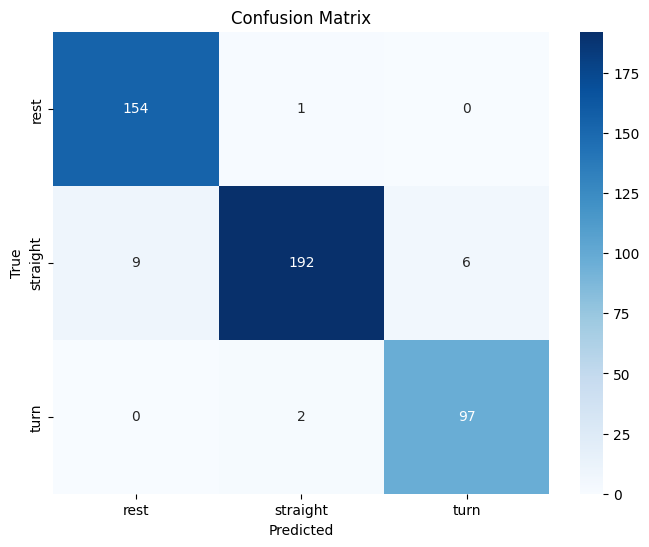

              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       155
    straight       0.98      0.93      0.96       207
        turn       0.94      0.98      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.97      0.96       461
weighted avg       0.96      0.96      0.96       461



In [59]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [60]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [61]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [62]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.93
test_set2 score: 0.67


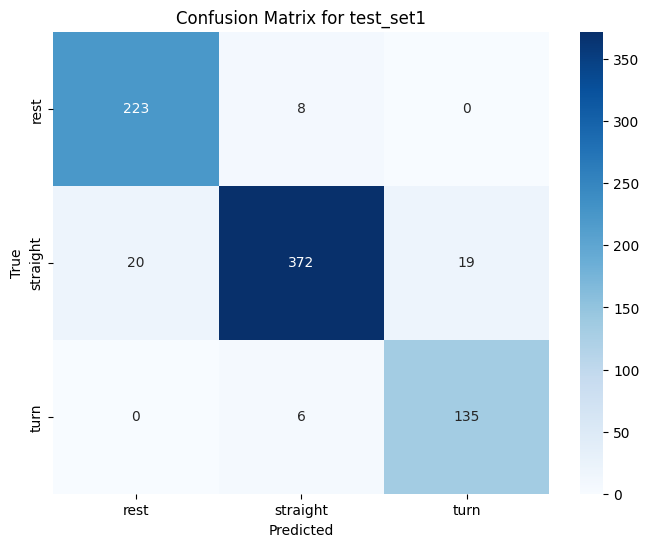

              precision    recall  f1-score   support

        rest       0.92      0.97      0.94       231
    straight       0.96      0.91      0.93       411
        turn       0.88      0.96      0.92       141

    accuracy                           0.93       783
   macro avg       0.92      0.94      0.93       783
weighted avg       0.93      0.93      0.93       783



In [63]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

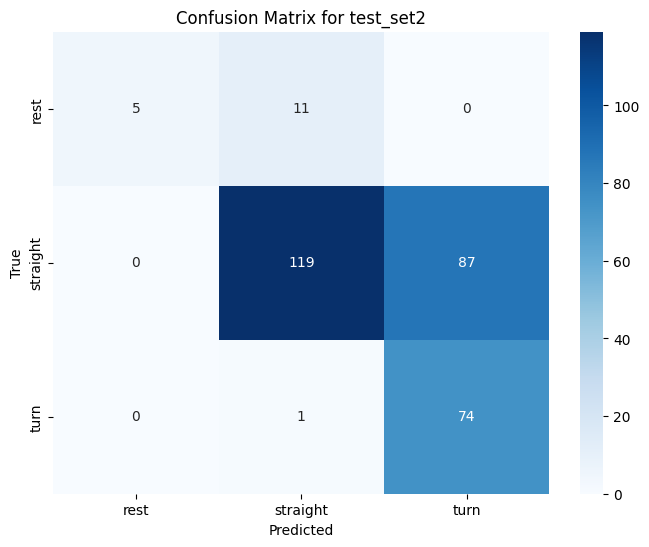

              precision    recall  f1-score   support

        rest       1.00      0.31      0.48        16
    straight       0.91      0.58      0.71       206
        turn       0.46      0.99      0.63        75

    accuracy                           0.67       297
   macro avg       0.79      0.63      0.60       297
weighted avg       0.80      0.67      0.67       297



In [64]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y2), yticklabels=np.unique(y2))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

print(classification_report(y2, y2_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

1. Section 1 (All Features):
The model trained on all available features likely achieved high accuracy on the training/validation set but struggled to generalize to new datasets, showing signs of overfitting. Including irrelevant or noisy features likely contributed to this issue.

Section 2 (Selected Features):
By selecting only a subset of features, this model traded some accuracy for improved consistency and robustness. Eliminating noise and redundancy resulted in better generalization compared to the Section 1 model.

Section 3 (Group Selected Features):
This model utilized a carefully chosen subset of features based on domain expertise or feature importance scores. It is expected to generalize better than Section 1 and potentially maintain higher accuracy than Section 2 due to a more deliberate feature selection process.

Section 4 (PCA):
Using Principal Component Analysis (PCA), this model reduced the dimensionality of the data by creating principal components that capture the most critical variance. This approach addresses overfitting seen in Section 1 and might outperform models with arbitrary or less optimized feature subsets (Sections 2 and 3) by improving generalization while preserving essential information.

2. porential differences observed between 1 and 4:
Overfitting Mitigation:
In Section 1, using all features made the model prone to overfitting since it tried to learn from everything, including noise and irrelevant details. Section 4, on the other hand, used PCA to narrow down the data to just the most important patterns, helping the model generalize better to new datasets.

Dimensionality Reduction:
The high number of features in Section 1 likely made the model more complex and less efficient, possibly hurting its performance. By reducing the number of features, PCA in Section 4 simplified the data while keeping the critical information intact, leading to better and more reliable results.








____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1. The ML model selected is Random Forest because it is an excellent choice for small, tabular datasets. It handles both numerical and categorical data without much preprocessing. It's robust to noise, performs well even when feature selection isn’t perfect, and avoids overfitting by using ensemble learning. With fewer hyperparameters to tune, it’s easier to work with compared to more complex models like Gradient Boosting or Neural Networks. Plus, it offers feature importance scores, making it easier to understand which features matter most.

In [65]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,8.046094e-07,1.319665e-07,3.267073e-08,9.797418,2.365611e-09,6.964705e-10,7.446916e-10
1,1.032619e-06,1.073067e-07,1.529967e-08,9.798815,2.242613e-09,6.533136e-10,6.983481e-10


In [66]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [67]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])


In [69]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = [{'scaler': [StandardScaler(), RobustScaler(), None],
               'classifier__n_estimators': [50, 100, 200],
               'classifier__max_depth': [None, 10, 20],
               'classifier__min_samples_split': [2, 5, 10]}]


In [70]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier__max_depth': [None, 10, 20],
                          'classifier__min_samples_split': [2, 5, 10],
                          'classifier__n_estimators': [50, 100, 200],
                          'scaler': [StandardScaler(), RobustScaler(), None]}],
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [71]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200, 'scaler': RobustScaler()}

Best cross-validation train score: 0.96
Best cross-validation validation score: 0.86
Test-set score: 0.84


Display the confusion matrix and print the classification report for the trained model using the *test* split.

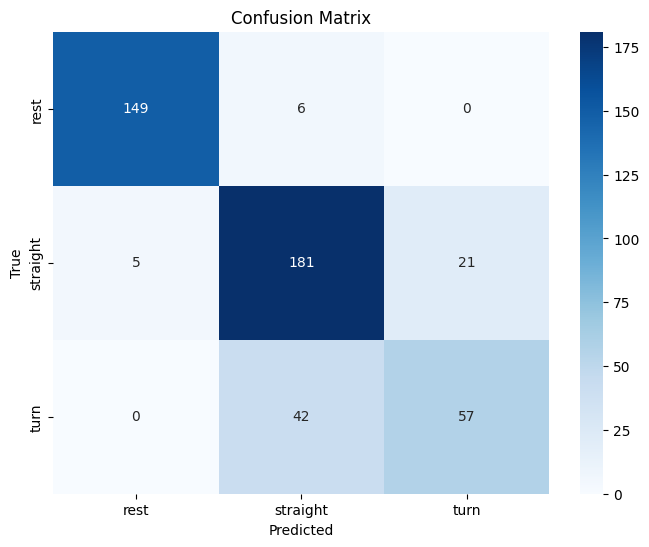

              precision    recall  f1-score   support

        rest       0.97      0.96      0.96       155
    straight       0.79      0.87      0.83       207
        turn       0.73      0.58      0.64        99

    accuracy                           0.84       461
   macro avg       0.83      0.80      0.81       461
weighted avg       0.84      0.84      0.84       461



In [72]:
# TODO - Display confusion matrix and print classification report

y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [73]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,0.000001,7.749919e-08,3.920063e-08,9.801661,3.655217e-09,6.507877e-10,7.727190e-10
1,0.000001,9.243000e-08,4.112300e-08,9.802481,3.349120e-09,6.788807e-10,8.871433e-10


In [74]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_var', 'a_sum', 'gx_var', 'gy_var', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_var,a_sum,gx_var,gy_var,gz_var
0,0.000002,3.020959e-07,6.324738e-08,9.800683,1.718706e-09,1.211633e-09,1.405038e-09
1,0.000003,6.859937e-07,3.110085e-07,9.797741,2.179497e-09,1.893673e-09,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [75]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.84
test_set2 score: 0.76


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

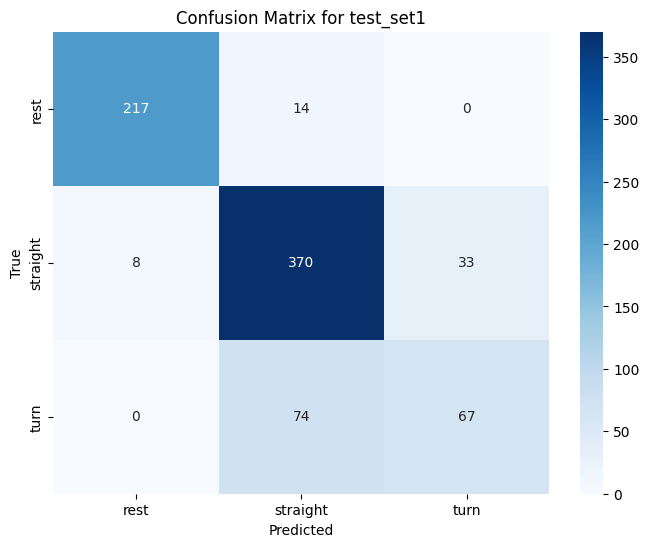

              precision    recall  f1-score   support

        rest       0.96      0.94      0.95       231
    straight       0.81      0.90      0.85       411
        turn       0.67      0.48      0.56       141

    accuracy                           0.84       783
   macro avg       0.81      0.77      0.79       783
weighted avg       0.83      0.84      0.83       783



In [76]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

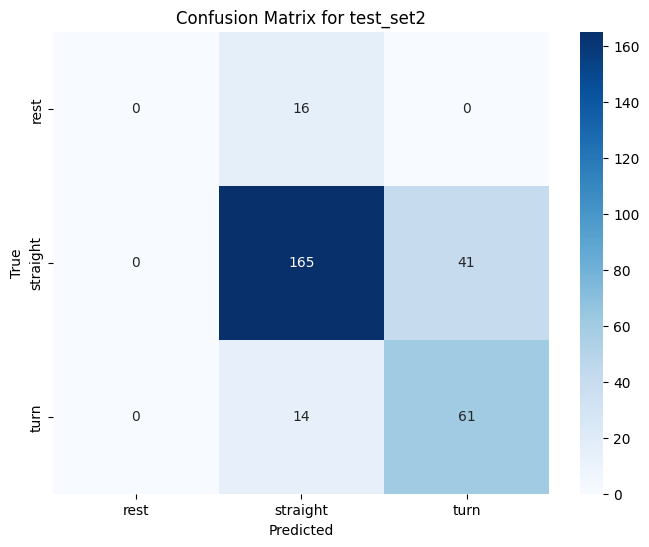

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.85      0.80      0.82       206
        turn       0.60      0.81      0.69        75

    accuracy                           0.76       297
   macro avg       0.48      0.54      0.50       297
weighted avg       0.74      0.76      0.74       297



In [78]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y2), yticklabels=np.unique(y2))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

print(classification_report(y2, y2_pred, zero_division=0))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. The SVC model in section 2 fits better because it demonstrates more consistent performance across the two test sets, with only a slight difference (0.83 vs. 0.84). In contrast, the Random Forest model shows a significant drop in performance on Test Set 2 (0.72), suggesting it may not generalize as well to unseen data.
The causes of discrepancies are listed below:
Overfitting by Random Forest:
Random Forest may have overfit to patterns specific to Test Set 1, leading to poor generalization on Test Set 2. This could happen if the trees in the forest were too deep, causing the model to memorize specific details of the training data.

Sensitivity to Feature Importance:
Random Forest relies on feature importance to build splits. If certain features are particularly informative for Test Set 1 but not for Test Set 2, the performance gap might widen. This suggests potential variability in the feature distributions between the two test sets.

SVC's Generalization:
SVC, being a margin-based classifier, focuses on finding the decision boundary that separates the data points. This approach may generalize better when feature distributions are slightly different across test sets, as it is less likely to overfit to specific patterns in the training data.

Difference in Test Set Characteristics:
Test Set 2 might have feature distributions or noise levels that differ slightly from the training set. SVC, being less sensitive to noise in feature importance, handles this better than Random Forest.

Model Complexity:
SVC's ability to maintain performance across different test sets suggests that its model complexity is well-tuned for the data, while Random Forest might require further tuning (e.g., reducing tree depth or number of trees).

____